<a href="https://colab.research.google.com/github/MilenaBaldeva/MilenaBaldeva/blob/main/Copy_of_Advanced_Data_Analytics_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Preview the dataset
print(data.head())
print(data.info())
print(data.describe())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
# Check for missing values
print(data.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# One-hot encode categorical variables
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Create new features
data['TimeSpentOnSite'] = data['ProductRelated_Duration'] + data['Administrative_Duration'] + data['Informational_Duration']
data['VisitorType_New'] = data['VisitorType_Returning_Visitor']

# Check the data after creating the new features
print(data.head())
print(data.info())

# Normalize continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Administrative', 'ProductRelated', 'BounceRates']] = scaler.fit_transform(data[['Administrative', 'ProductRelated', 'BounceRates']])


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_16  \
0         0.20       0.20         0.0         0.0  ...           False   
1         0.00       0.10         0.0         0.0  ...          

In [ ]:
# Check for missing values again
print(data.isnull().sum())


Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
                                ..
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Weekend_True                     0
TimeSpentOnSite                  0
VisitorType_New                  0
Length: 71, dtype: int64


# Exploratory Data Analysis (EDA)

**Visualize Numerical Variables**

In [ ]:
import matplotlib.pyplot as plt

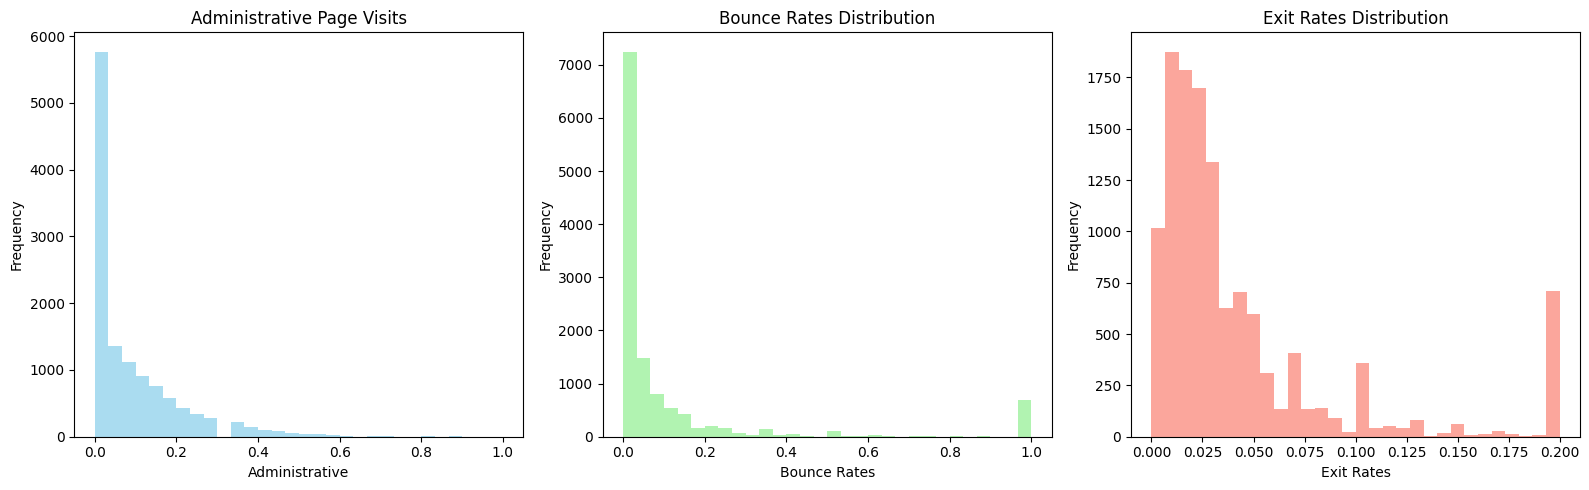

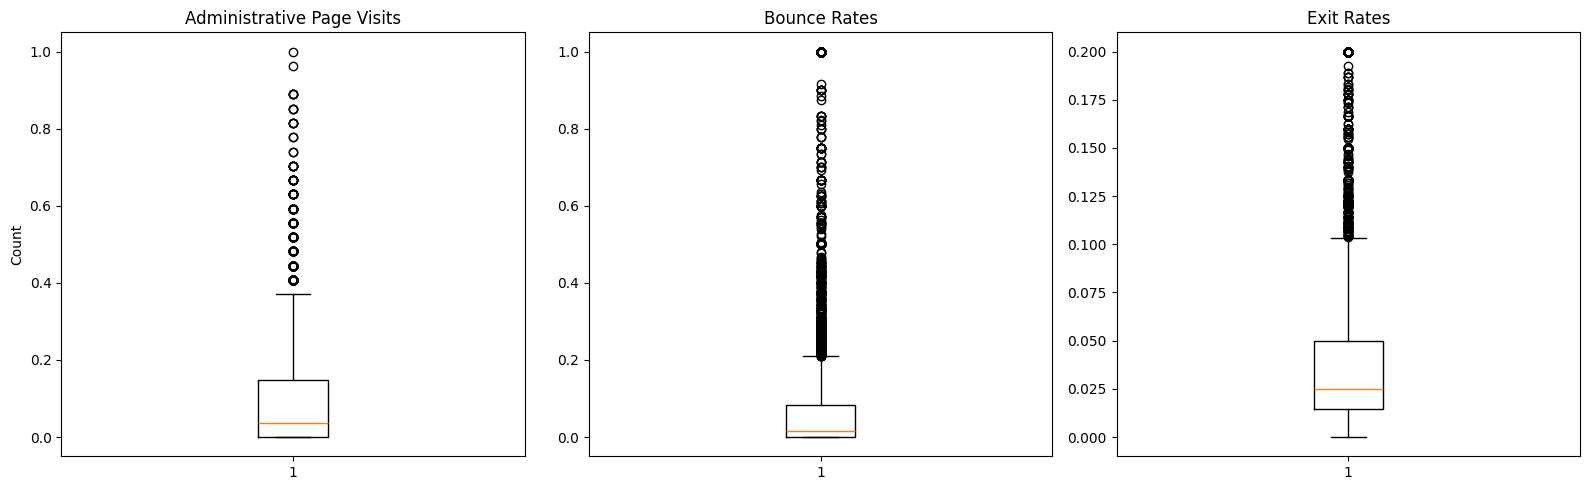

In [ ]:
# Histogram for Administrative, BounceRates, and ExitRates
plt.figure(figsize=(16, 5))

# Administrative
plt.subplot(1, 3, 1)
data['Administrative'].plot(kind='hist', bins=30, color='skyblue', alpha=0.7, title='Administrative Page Visits')
plt.xlabel('Administrative')

# BounceRates
plt.subplot(1, 3, 2)
data['BounceRates'].plot(kind='hist', bins=30, color='lightgreen', alpha=0.7, title='Bounce Rates Distribution')
plt.xlabel('Bounce Rates')

# ExitRates
plt.subplot(1, 3, 3)
data['ExitRates'].plot(kind='hist', bins=30, color='salmon', alpha=0.7, title='Exit Rates Distribution')
plt.xlabel('Exit Rates')

plt.tight_layout()
plt.show()

# Box plots for Administrative, BounceRates, and ExitRates
plt.figure(figsize=(16, 5))

# Administrative
plt.subplot(1, 3, 1)
plt.boxplot(data['Administrative'])
plt.title('Administrative Page Visits')
plt.ylabel('Count')

# BounceRates
plt.subplot(1, 3, 2)
plt.boxplot(data['BounceRates'])
plt.title('Bounce Rates')

# ExitRates
plt.subplot(1, 3, 3)
plt.boxplot(data['ExitRates'])
plt.title('Exit Rates')

plt.tight_layout()
plt.show()

**Analyze Categorical Variables**

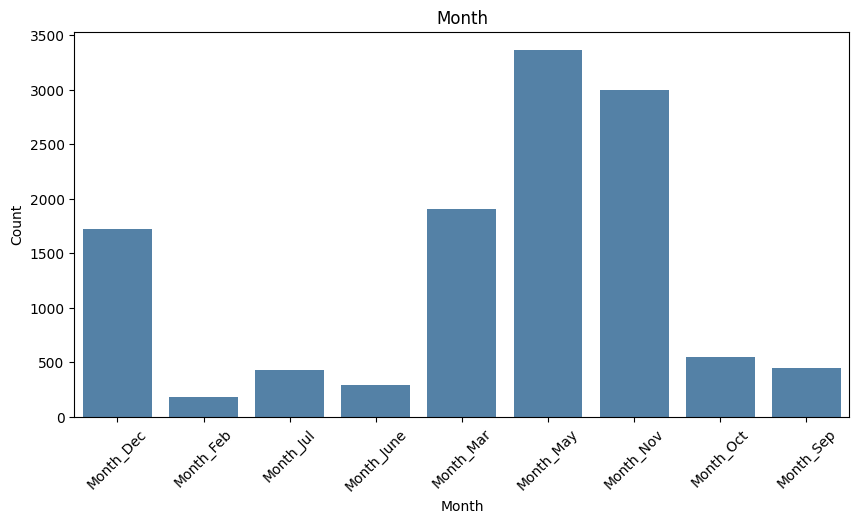

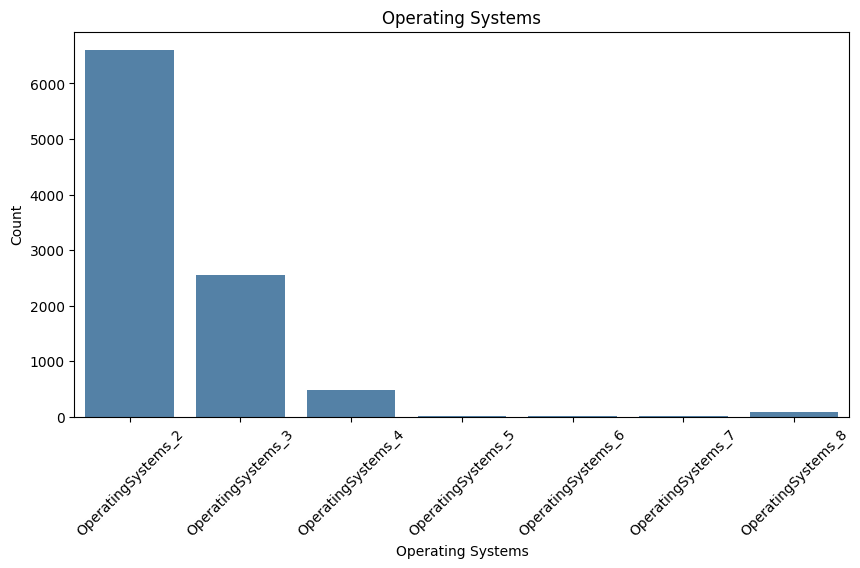

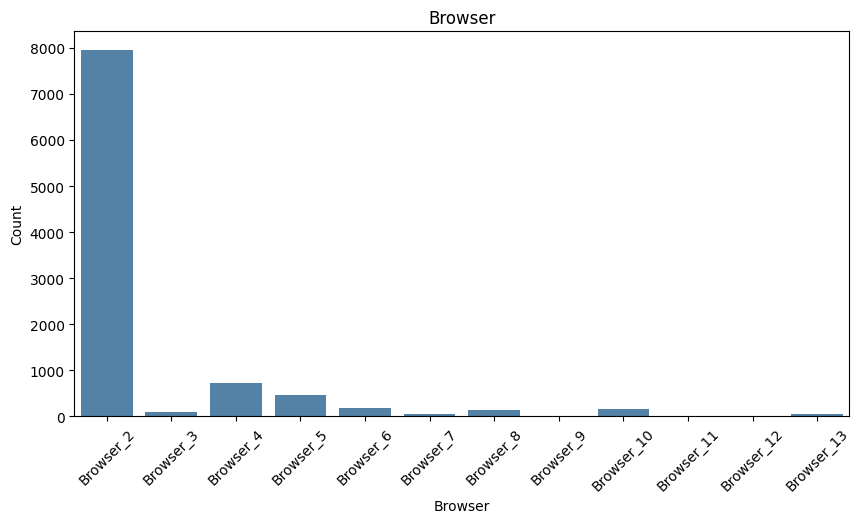

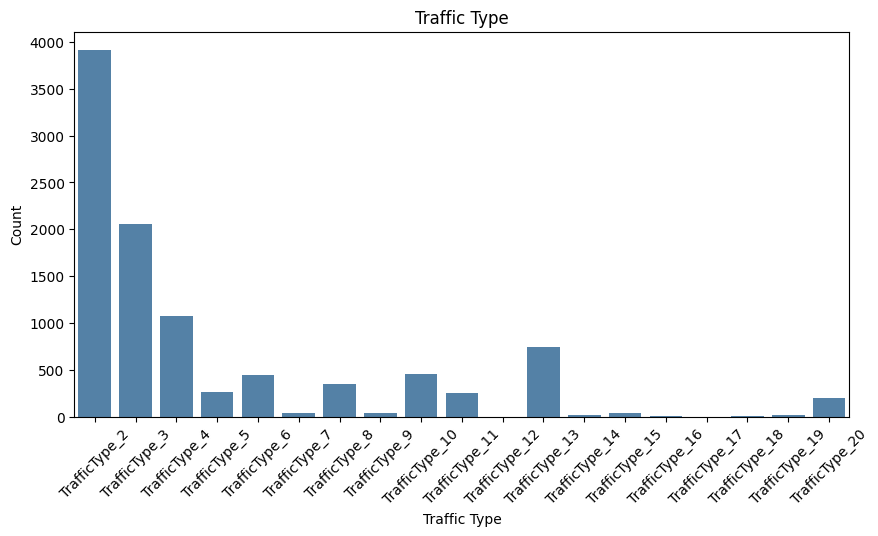

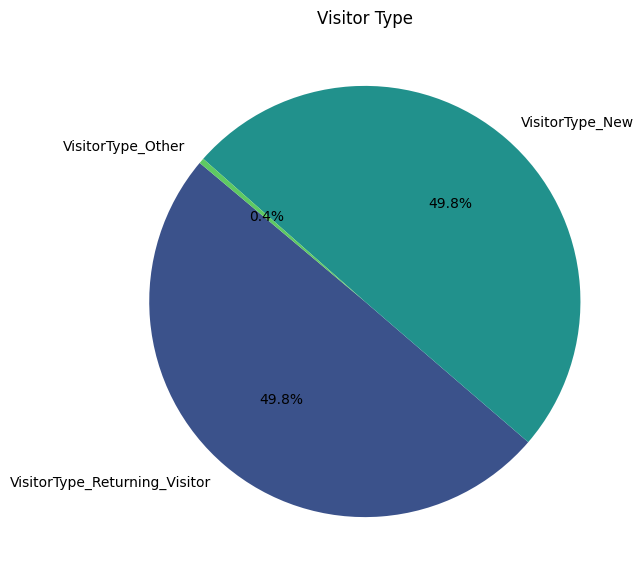

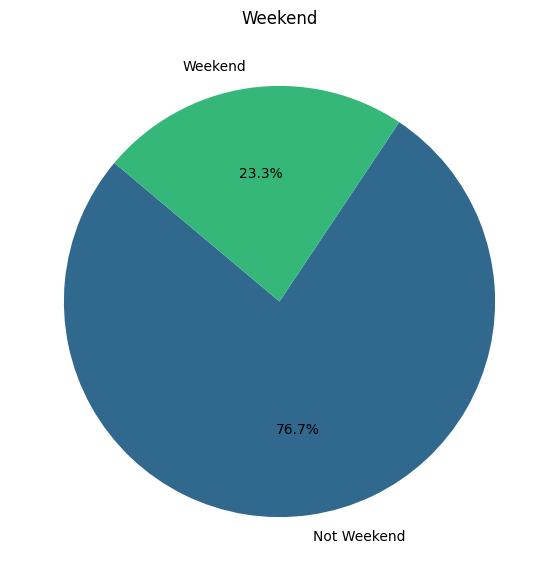

In [ ]:
import pandas as pd
import seaborn as sns

# Function to plot bar and pie charts for categorical variables
def plot_categorical_charts(data, column_prefix, title):
    # Combine the one-hot encoded columns for the categorical variable
    categories = [col for col in data.columns if col.startswith(column_prefix)]
    counts = data[categories].sum()

    # Bar Chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts.index, y=counts.values, color='steelblue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.show()



# Month
plot_categorical_charts(data, column_prefix='Month_', title='Month')

# Operating Systems
plot_categorical_charts(data, column_prefix='OperatingSystems_', title='Operating Systems')

# Browser
plot_categorical_charts(data, column_prefix='Browser_', title='Browser')

# Traffic Type
plot_categorical_charts(data, column_prefix='TrafficType_', title='Traffic Type')

# Visitor Type
visitor_type_counts = data[['VisitorType_Returning_Visitor', 'VisitorType_New', 'VisitorType_Other']].sum()
plt.figure(figsize=(7, 7))
plt.pie(visitor_type_counts.values, labels=visitor_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 3))
plt.title('Visitor Type')
plt.show()

# Weekend
weekend_counts = data['Weekend_True'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(weekend_counts.values, labels=['Not Weekend', 'Weekend'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 2))
plt.title('Weekend')
plt.show()


**Correlation analysis**

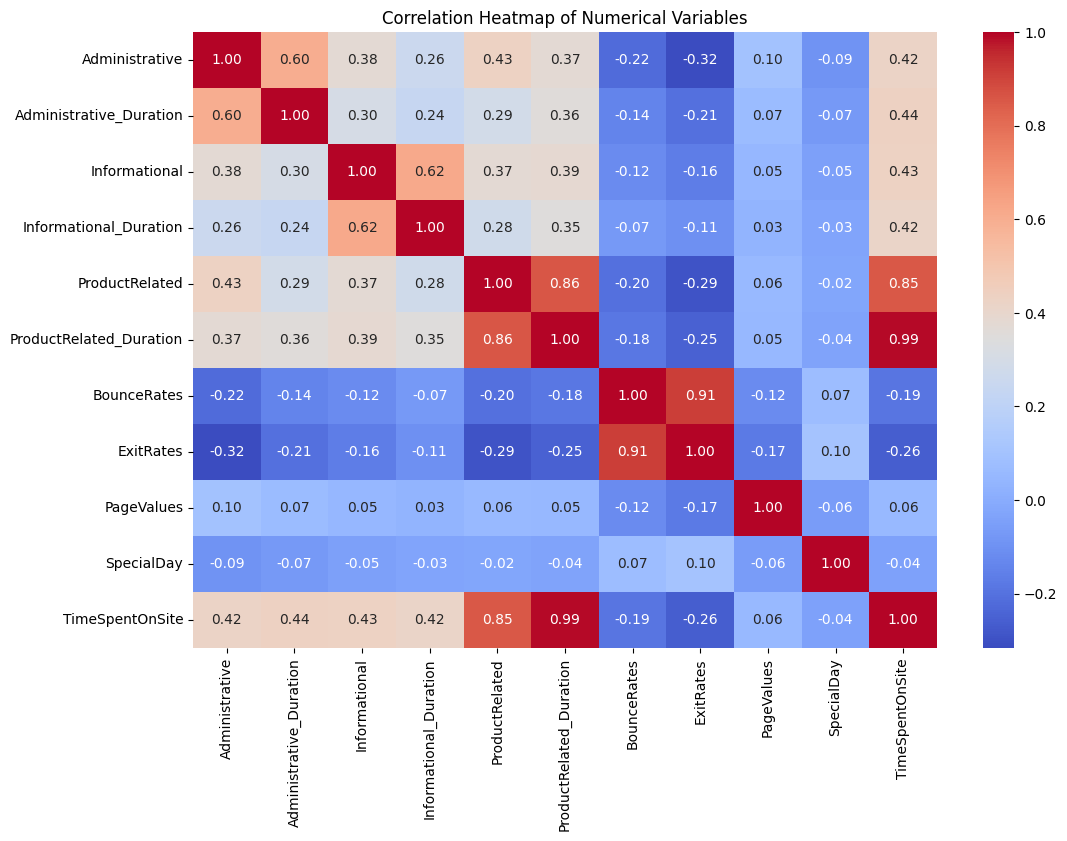

In [ ]:
# Extract numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Key insights**

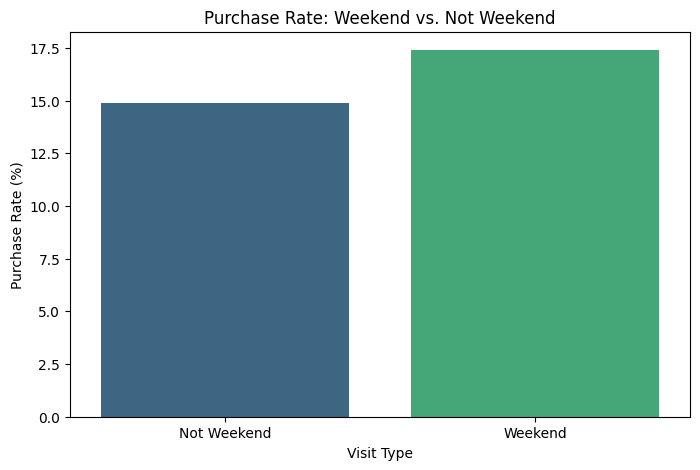

In [ ]:
# Analyze purchase rates for weekend and non-weekend visits
weekend_purchase = data.groupby('Weekend_True')['Revenue'].mean() * 100

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=['Not Weekend', 'Weekend'], y=weekend_purchase.values, hue = ['Not Weekend', 'Weekend'], palette='viridis', legend = False)
plt.title('Purchase Rate: Weekend vs. Not Weekend')
plt.ylabel('Purchase Rate (%)')
plt.xlabel('Visit Type')
plt.show()

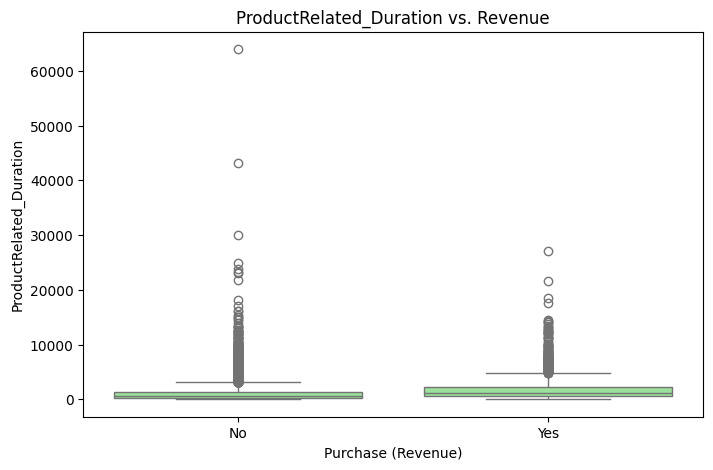

In [ ]:
# Relationship between ProductRelated_Duration and Revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=data, color='lightgreen')
plt.title('ProductRelated_Duration vs. Revenue')
plt.ylabel('ProductRelated_Duration')
plt.xlabel('Purchase (Revenue)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



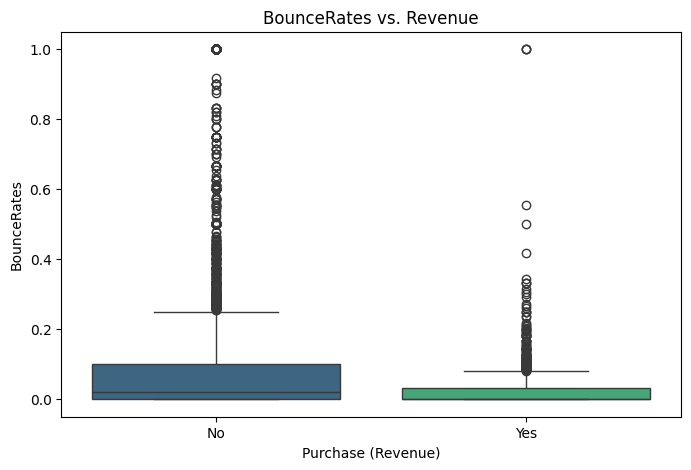

In [ ]:
# Relationship between BounceRates and Revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x='Revenue', y='BounceRates', data=data, hue='Revenue', palette='viridis', legend=False)
plt.title('BounceRates vs. Revenue')
plt.ylabel('BounceRates')
plt.xlabel('Purchase (Revenue)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


# Feature Engineering

In [ ]:
#Creating new features
data['TimeSpentOnSite'] = data['ProductRelated_Duration'] + data['Administrative_Duration'] + data['Informational_Duration']

In [ ]:
# Binary Conversion
data['VisitorType_New'] = data['VisitorType_Returning_Visitor'].astype(int)


In [ ]:
# Checking distribution to see if normalization is needed
data[['ProductRelated', 'Administrative', 'BounceRates']].describe()

,ProductRelated,Administrative,BounceRates
count,12330.000000,12330.000000,12330.000000
mean,0.045009,0.085747,0.110957
std,0.063086,0.123029,0.242442
min,0.000000,0.000000,0.000000
25%,0.009929,0.000000,0.000000
50%,0.025532,0.037037,0.015562
75%,0.053901,0.148148,0.084063
max,1.000000,1.000000,1.000000


Values are already between 0 and 1. Normalizaton is not needed.

In [ ]:
# Target variable creation
data['Revenue'] = data['Revenue'].astype(int) # Revenie as a Binary Target


In [ ]:
print(data['Revenue'].unique())


[0 1]


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop(columns=['Revenue'])  # Drop target variable from features
y = data['Revenue']  # Target variable

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # 'stratify=y' Ensures the proportion of buyers (1) and non-buyers (0) remains the same in both train and test sets
)


In [ ]:
# Checking if the Split is Balanced

print("Training set class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True) * 100)


Training set class distribution:
Revenue
0    84.529603
1    15.470397
Name: proportion, dtype: float64

Testing set class distribution:
Revenue
0    84.509327
1    15.490673
Name: proportion, dtype: float64


The distribution is nearly identical in both training and testing sets, meaning the target variable (Revenue) is balanced in both sets.

# Model Development

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb


## 1.Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)



## 2. Random Forest Classifier


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

## 3. Gradient Boosting (XGBoost)

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

## Hyperparameter tuning

In [ ]:
# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],         # Regularization type
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

best_params_logreg = grid_search_logreg.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_logreg}")

Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5)
random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}


In [ ]:
!pip install xgboost==1.5.0
!pip install scikit-learn==0.24.1


In [ ]:
!pip install xgboost==1.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
!pip cache purge
!pip install --force-reinstall scikit-learn==0.24.1



In [ ]:
!pip install numpy==1.19.5 scipy==1.5.4
!pip install scikit-learn==0.24.1


In [ ]:
!pip install scikit-learn==1.0.2

  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.5 MB/s eta 0:00:00


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
!pip install --upgrade pip setuptools

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install --upgrade xgboost


  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import xgboost
import sklearn

print(xgboost.__version__)
print(sklearn.__version__)


2.1.3
1.6.1


In [ ]:
# Hyperparameter tuning for XGBoost using RandomizedSearchCV

from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

random_search_xgb = RandomizedSearchCV(XGBClassifier(), param_dist, n_iter=10, cv=5)
random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Hyperparameter tuning for XGBoost using GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_dist, cv=5)
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
# Function to Evaluate Models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

    print("\nModel Evaluation:")
    print("-----------------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Logistic Regression

print("Logistic Regression:")
evaluate_model(logreg, X_test_scaled, y_test)

Logistic Regression:

Model Evaluation:
-----------------
Accuracy: 0.8811841038118411
Precision: 0.7379679144385026
Recall: 0.3612565445026178
F1-Score: 0.4850615114235501
ROC-AUC Score: 0.8809779823336112

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.74      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

Confusion Matrix:
 [[2035   49]
 [ 244  138]]


In [ ]:
# Evaluate Random Forest
print("Random Forest:")
evaluate_model(rf, X_test, y_test)

Random Forest:

Model Evaluation:
-----------------
Accuracy: 0.8978102189781022
Precision: 0.7407407407407407
Recall: 0.5235602094240838
F1-Score: 0.6134969325153374
ROC-AUC Score: 0.9168169850569284

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.74      0.52      0.61       382

    accuracy                           0.90      2466
   macro avg       0.83      0.74      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Confusion Matrix:
 [[2014   70]
 [ 182  200]]


In [ ]:
# Evaluate Gradient Boosting (XGBoost)
print("Gradient Boosting (XGBoost):")
evaluate_model(xgb_model, X_test, y_test)

Gradient Boosting (XGBoost):

Model Evaluation:
-----------------
Accuracy: 0.8949716139497161
Precision: 0.6803519061583577
Recall: 0.6073298429319371
F1-Score: 0.6417704011065007
ROC-AUC Score: 0.9213227683371688

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.68      0.61      0.64       382

    accuracy                           0.89      2466
   macro avg       0.80      0.78      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Confusion Matrix:
 [[1975  109]
 [ 150  232]]


## Model comparison

| Model                     | Accuracy | Precision | Recall  | F1-Score | ROC-AUC Score |
|---------------------------|----------|-----------|--------|----------|---------------|
| Logistic Regression       | 0.8812   | 0.7380    | 0.3613 | 0.4851   | 0.8810        |
| Random Forest            | 0.8978   | 0.7407    | 0.5236 | 0.6135   | 0.9168        |
| XGBoost (Gradient Boosting) | 0.8950   | 0.6804    | 0.6073 | 0.6418   | 0.9213        |

## Best Model Selection
- Accuracy: Random Forest (0.8978) is slightly higher than XGBoost (0.8950).
- Precision: Random Forest (0.7407) is slightly better than Logistic Regression (0.7380), and better than XGBoost (0.6804).
- Recall: XGBoost (0.6073) is the highest, meaning it identifies more actual positives.
- F1-Score: XGBoost (0.6418) is the best, showing a good balance between Precision and Recall.
- ROC-AUC Score: XGBoost (0.9213) is the highest, indicating the best overall performance in distinguishing between classes.

## Conclusion
- XGBoost is the best model overall because it has the highest Recall, F1-Score, and ROC-AUC, which are critical when dealing with class imbalance.
- Random Forest is a close second, with slightly higher Accuracy and Precision, but lower Recall than XGBoost.
- Logistic Regression performs the worst, especially in Recall and F1-Score.

# Variable Importance and Insights

## Variable Importance

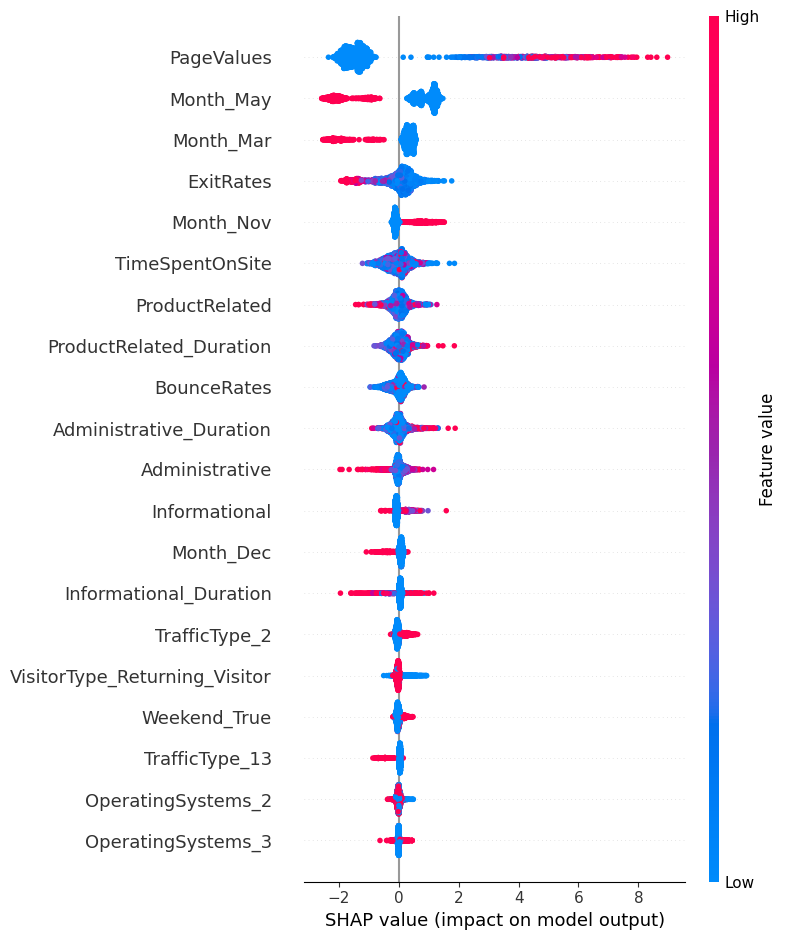

In [ ]:
# SHAP Values

import shap
from sklearn.preprocessing import LabelEncoder

# Create a copy of X_train and X_test to avoid modifying the originals
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Initialize SHAP explainer for XGBoost using the encoded data
# Make sure data is numerical
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)
explainer = shap.Explainer(xgb_model, X_train_encoded)
shap_values = explainer(X_test_encoded)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test_encoded)

## Insights

- ***PageValues:*** This is the most influential feature, indicating that the average value of pages visited by a customer significantly impacts the likelihood of a purchase. Higher page values often correlate with higher purchase intent.

- ***Month_May and Month_Mar:*** The month of the visit also plays a crucial role. Visits in May and March are particularly influential, suggesting seasonal trends or promotions during these months that drive purchases.

- ***ExitRates:*** The rate at which customers leave the site from a specific page is another critical factor. Lower exit rates are likely associated with higher purchase probabilities.

- ***TimeSpentOnSite:*** The total time spent on the site is a strong indicator of purchase intent. Customers who spend more time exploring the site are more likely to make a purchase.

- ***ProductRelated and ProductRelated_Duration:*** The number of product-related pages visited and the time spent on these pages are significant. This suggests that engagement with product information is a key driver of purchase decisions.

- ***BounceRates:*** The percentage of visitors who leave the site after viewing only one page negatively impacts purchase likelihood. Lower bounce rates are preferable.

- ***Administrative_Duration and Administrative:*** The time spent on administrative pages and the number of such pages visited also influence purchase decisions, though to a lesser extent than product-related activities.

- ***Informational and Informational_Duration:*** Engagement with informational content is important, but less so than product-related activities.

- ***Month_Dec:*** Visits in December also have a notable impact, likely due to holiday shopping trends.

- ***TrafficType_2 and TrafficType_13:*** The source of traffic is another influencing factor. Certain traffic types are more likely to result in purchases.

- ***VisitorType_Returning_Visitor:*** Returning visitors are more likely to make a purchase compared to new visitors, highlighting the importance of customer retention strategies.

- ***Weekend_True:*** Visits during the weekend have a positive impact on purchase likelihood, possibly due to customers having more leisure time to browse and shop.

- ***OperatingSystems_2 and OperatingSystems_3:*** The operating system used by the visitor also plays a role, though it is less significant compared to other factors.

# Recommendations:
Enhance Page Value: Focus on strategies to increase the value of pages, such as personalized recommendations and targeted promotions.

Seasonal Campaigns: Leverage the influence of specific months (May, March, December) by running targeted marketing campaigns and promotions.

Reduce Exit and Bounce Rates: Improve website usability and content relevance to keep customers engaged and reduce early exits.

Engage Customers with Product Content: Ensure that product-related pages are informative and engaging to encourage longer visits and higher purchase intent.

Retain Returning Visitors: Implement loyalty programs and personalized offers to encourage repeat visits and purchases.

Weekend Promotions: Consider special weekend promotions or events to capitalize on higher purchase intent during these periods.